In [1]:
import sys
sys.path.append("../../build-libs-Desktop-Debug/core/wrappers/python")  # set to correct path for module"
import rtbotpy

In [31]:
import numpy as np
import json

with open('../data/ppg.json', 'r') as f:
  prog = json.load(f)
ppg=np.loadtxt("../data/ppg.csv", skiprows=1, delimiter=',')

pipe=rtbotpy.Pipeline(json.dumps(prog))
peak=[]
for t,v in ppg:
    out=pipe.receiveDebug(rtbotpy.Message(int(t*1000),-v))
    if (out.get("o1")): 
        msg=out.get("o1")[0]
        peak += [[msg.time,msg.value]]
peak=np.array(peak)      

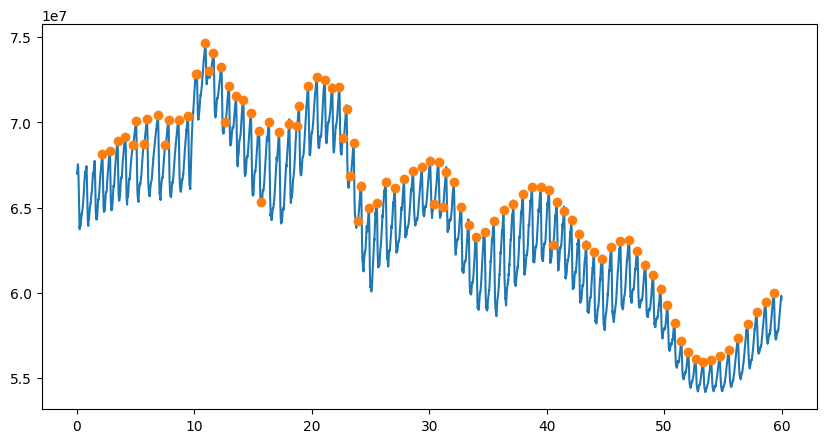

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5),dpi=100)
plt.plot(ppg[:,0], -ppg[:,1])
plt.plot(peak[:,0]/1000, peak[:,1], 'o')